In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal
import statsmodels.api as sm
import os
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Red Band')

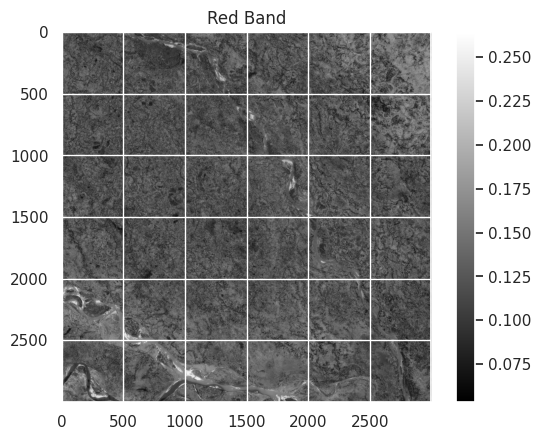

In [ ]:
#reading the RED band
RED_b = gdal.Open('/content/drive/MyDrive/IITB/SEM_2/CE_716/LC08_L2SP_141042_20221127_20221206_02_T1_SR_B4.TIF')
RED_b_1 = RED_b.GetRasterBand(1)
RED_band_arr = RED_b_1.ReadAsArray()
RED_band_arr_cropped = RED_band_arr[2000:5000,2000:5000]
RED_band_1 = RED_band_arr_cropped.astype('f4')
RED_band_1[RED_band_1 == 0] = np.nan
RED_band = RED_band_1 * 0.00002-0.1
plt.imshow(RED_band, cmap='gray')
plt.colorbar()
plt.title('Red Band')

Text(0.5, 1.0, 'NIR Band')

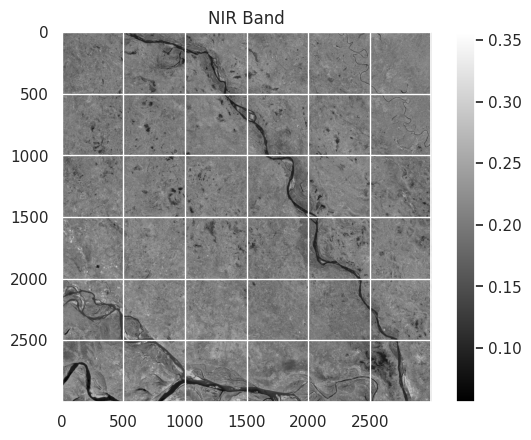

In [ ]:
#reading the NIR band
NIR_b = gdal.Open('/content/drive/MyDrive/IITB/SEM_2/CE_716/LC08_L2SP_141042_20221127_20221206_02_T1_SR_B5.TIF')
NIR_b_1 = NIR_b.GetRasterBand(1)
NIR_band_arr = NIR_b_1.ReadAsArray()
NIR_band_arr_cropped = NIR_band_arr[2000:5000,2000:5000]
NIR_band_1 = NIR_band_arr_cropped.astype('f4')
NIR_band_1[NIR_band_1 == 0] = np.nan
NIR_band = NIR_band_1 * 0.00002-0.1
plt.imshow(NIR_band, cmap='gray')
plt.colorbar()
plt.title('NIR Band')

Text(0.5, 1.0, 'SWIR Band')

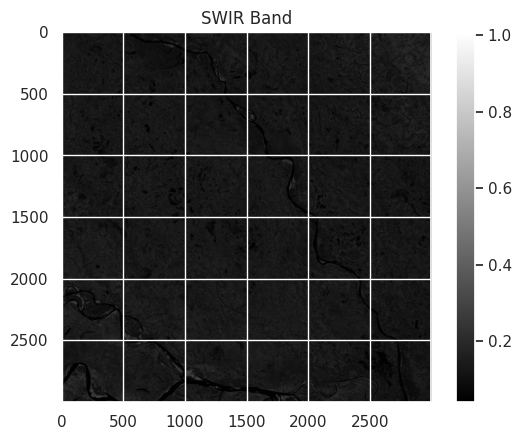

In [ ]:
#reading the SWIR band
SWIR_b = gdal.Open('/content/drive/MyDrive/IITB/SEM_2/CE_716/LC08_L2SP_141042_20221127_20221206_02_T1_SR_B7.TIF')
SWIR_b_1 = SWIR_b.GetRasterBand(1)
SWIR_band_arr = SWIR_b_1.ReadAsArray()
SWIR_band_arr_cropped = SWIR_band_arr[2000:5000,2000:5000]
SWIR_band_1 = SWIR_band_arr_cropped.astype('f4')
SWIR_band_1[SWIR_band_1 == 0] = np.nan
SWIR_band = SWIR_band_1 *0.00002-0.1
SWIR_band_2 = SWIR_band/1.2
plt.imshow(SWIR_band_2, cmap='gray')
plt.colorbar()
plt.title('SWIR Band')

Text(0.5, 1.0, 'NDVI map')

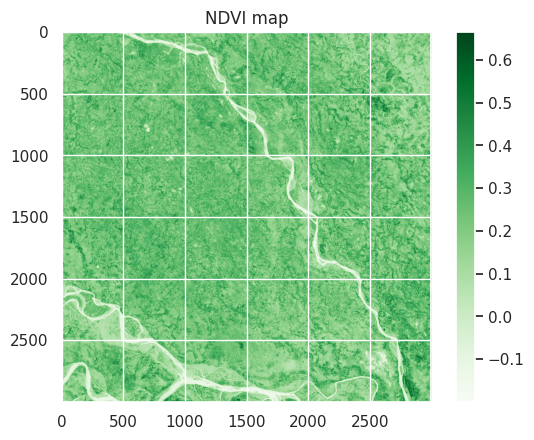

In [ ]:
#NDVI calculation
NDVI = (NIR_band - RED_band)/(NIR_band + RED_band)
plt.imshow(NDVI,cmap='Greens')
plt.colorbar()
plt.title('NDVI map')

In [ ]:
#mask creation to remove pixels with negative NDVI values
mask = np.zeros(NDVI.shape)
for i in range(mask.shape[0]):
  for j in range(mask.shape[1]):
    if NDVI[i][j] <= 0:
      mask[i][j] = np.nan
    else:
      mask[i][j] = 1

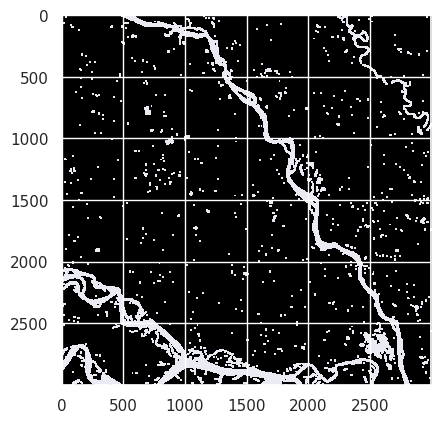

In [ ]:
#plotting mask
plt.imshow(mask,cmap='gray')

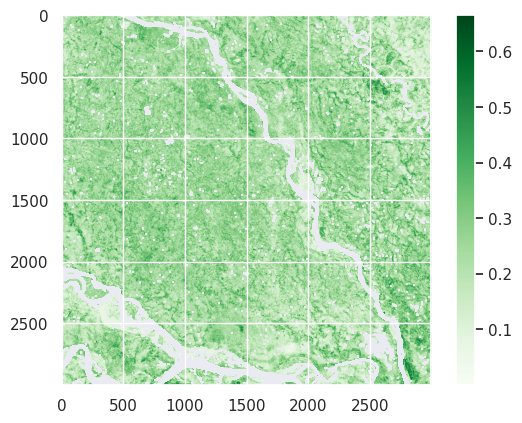

In [ ]:
#applying mask on NDVI map
NDVI_filtered = NDVI * mask
plt.imshow(NDVI_filtered,cmap='Greens')
plt.colorbar()

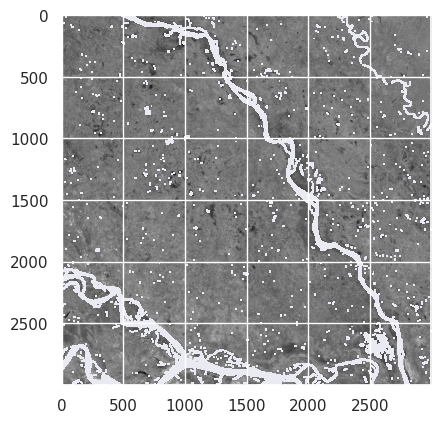

In [ ]:
#applying mask on NIR data
NIR_filtered = NIR_band*mask
plt.imshow(NIR_filtered,cmap='gray')

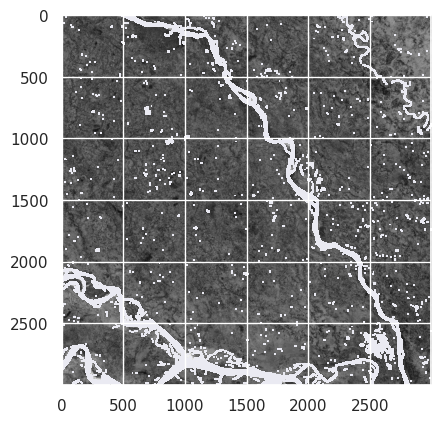

In [ ]:
#applying mask on RED band
RED_filtered = RED_band*mask
plt.imshow(RED_filtered,cmap='gray')

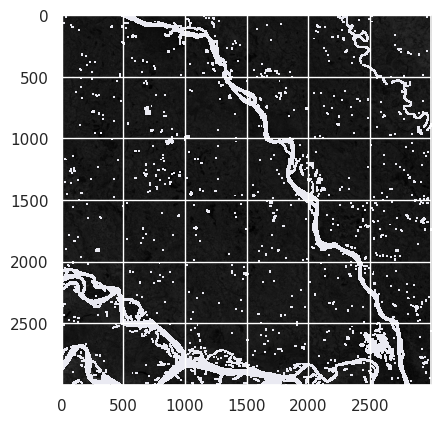

In [ ]:
#applying mask on SWIR data
SWIR_filtered = SWIR_band*mask
plt.imshow(SWIR_filtered,cmap='gray')

Text(0.5, 1.0, 'STR map')

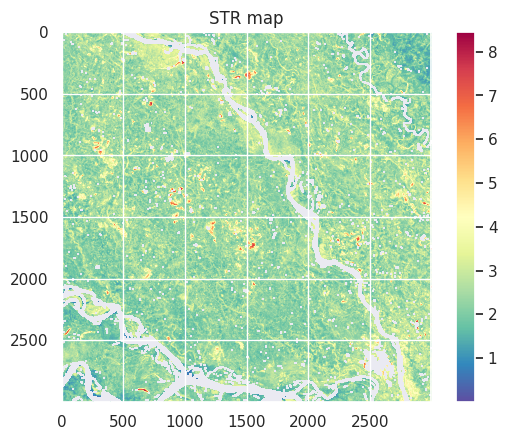

In [ ]:
# STR calculation
STR = ((1-SWIR_filtered)**2)/(2 * SWIR_filtered)
plt.imshow(STR,cmap = 'Spectral_r')
plt.colorbar()
plt.title('STR map')

In [ ]:
#making the data into single array
NDVI = np.reshape(NDVI_filtered,-1)
SWIR = np.reshape(SWIR_filtered,-1)
STR = np.reshape(STR,-1)

Text(0, 0.5, 'SWIR')

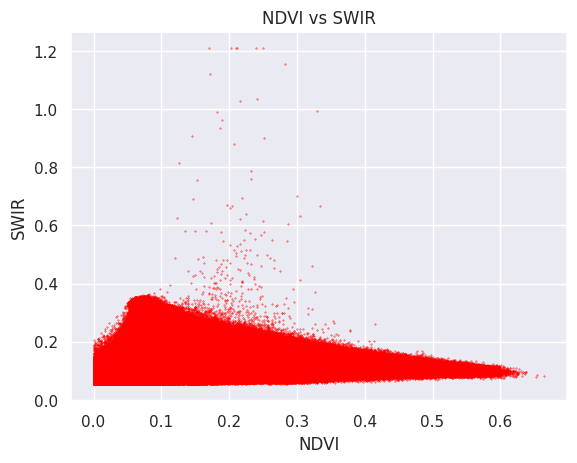

In [ ]:
# plotting scatter plot
plt.scatter(NDVI,SWIR,s=.1, color='red')
plt.title('NDVI vs SWIR')
plt.xlabel('NDVI')
plt.ylabel('SWIR')

In [ ]:
#creating dataframe for sorting values
df = pd.DataFrame({'NDVI':NDVI,'STR':STR})
df

,NDVI,STR
0,0.317729,3.755070
1,0.412079,4.082889
2,0.482694,4.522102
3,0.479904,4.473763
4,0.410138,3.092978
...,...,...
8999995,0.276764,3.824293
8999996,0.279699,3.811716
8999997,0.260163,3.959628
8999998,0.243703,3.276554


In [ ]:
#rounding off the NDVI values
df_new = df.round({'NDVI':3})
df_new
df_new.describe()

,NDVI,STR
count,8.766527e+06,8.766527e+06
mean,2.373238e-01,2.470786e+00
std,8.953918e-02,8.502429e-01
min,0.000000e+00,1.296961e-05
25%,1.740000e-01,1.907805e+00
50%,2.290000e-01,2.283128e+00
75%,2.920000e-01,2.831461e+00
max,6.650000e-01,8.446284e+00


Text(0, 0.5, 'STR')

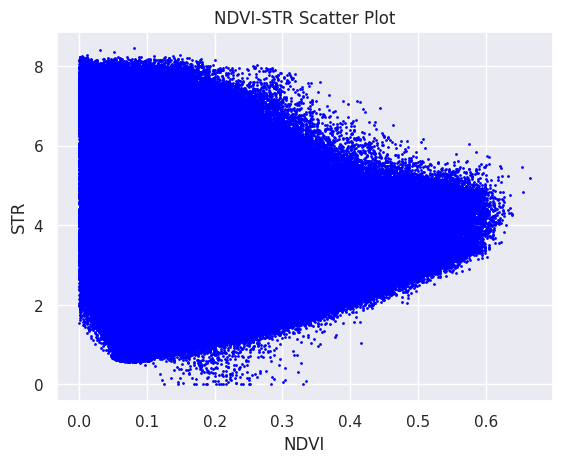

In [ ]:
#plotting scatter plot for NDVI and STR values
#df_new = df_NDVI_rounded
plt.scatter(df_new['NDVI'],df_new['STR'],s=1,color='blue')
plt.title('NDVI-STR Scatter Plot')
plt.xlabel('NDVI')
plt.ylabel('STR')

In [ ]:
#sorting values for wet edge estimation
sort_top = df_new.sort_values(by='STR',ascending=False).drop_duplicates('NDVI',keep='first')
df_top = sort_top.sort_values(by='NDVI',ascending=True)
df_top = df_top.dropna()

#sorting values for dry edge estimation
sort_bottom = df_new.sort_values(by='STR',ascending=False).drop_duplicates('NDVI',keep='last')
df_bottom = sort_bottom.sort_values(by='NDVI',ascending=True)
df_bottom = df_bottom.dropna()

In [ ]:
df_top.describe()

,NDVI,STR
count,638.000000,638.000000
mean,0.318641,6.892691
std,0.184568,1.184588
min,0.000000,4.016570
25%,0.159250,5.691822
50%,0.318500,7.349519
75%,0.477750,8.010137
max,0.665000,8.446284


In [ ]:
df_bottom.describe()

,NDVI,STR
count,638.000000,638.000000
mean,0.318641,1.599999
std,0.184568,1.115621
min,0.000000,0.000013
25%,0.159250,0.637517
50%,0.318500,1.415814
75%,0.477750,2.381412
max,0.665000,5.470566


In [ ]:
# line fitting using ordinary least squares for wet edge
x_1 = df_top['NDVI']
y = df_top['STR']
x = sm.add_constant(x_1)
result_1 = sm.OLS(y,x).fit()
print('TOP VALUES OF NDVI REGRESSION\n',result_1.summary())

TOP VALUES OF NDVI REGRESSION
                             OLS Regression Results                            
Dep. Variable:                    STR   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     5376.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          1.99e-312
Time:                        05:20:49   Log-Likelihood:                -296.29
No. Observations:                 638   AIC:                             596.6
Df Residuals:                     636   BIC:                             605.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8266

In [ ]:
#applying the intercept and slope values and defining the equation (wet edge)
i_w =  8.8266
s_w = -6.0692
wet_edge = i_w + s_w * x_1

In [ ]:
# line fitting using ordinary least squares for dry edge
x_2 = df_bottom['NDVI']
y = df_bottom['STR']
x = sm.add_constant(x_2)
result_2 = sm.OLS(y,x).fit()
print('BOTTOM VALUES OF NDVI REGRESSION\n',result_2.summary())

BOTTOM VALUES OF NDVI REGRESSION
                             OLS Regression Results                            
Dep. Variable:                    STR   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1755.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          4.82e-185
Time:                        05:20:49   Log-Likelihood:                -552.16
No. Observations:                 638   AIC:                             1108.
Df Residuals:                     636   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0

In [ ]:
#applying the intercept and slope values and defining the equation (dry edge)
i_d = -0.0501
s_d = 5.1785
dry_edge = i_d + s_d * x_2

Text(0, 0.5, 'STR')

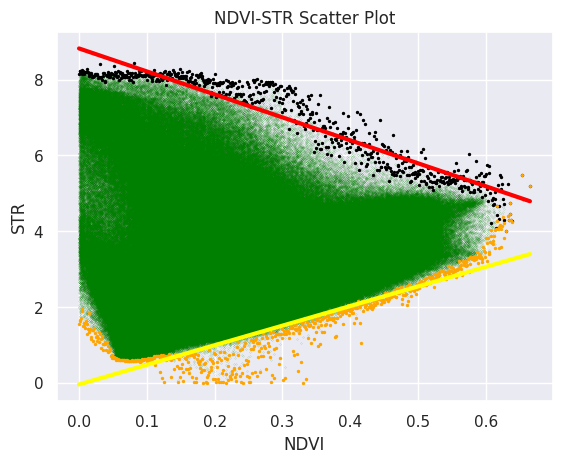

In [ ]:
#plotting the scatter plot
plt.scatter(df_new['NDVI'],df_new['STR'],s=0.005,color='green')
plt.scatter(df_top['NDVI'],df_top['STR'],s=2,color='black')
plt.scatter(df_bottom['NDVI'],df_bottom['STR'],s=2,color='orange')
plt.plot(x_1,wet_edge,c='red',lw=3)
plt.plot(x_2,dry_edge,c='yellow',lw=3)
plt.title('NDVI-STR Scatter Plot')
plt.xlabel('NDVI')
plt.ylabel('STR')

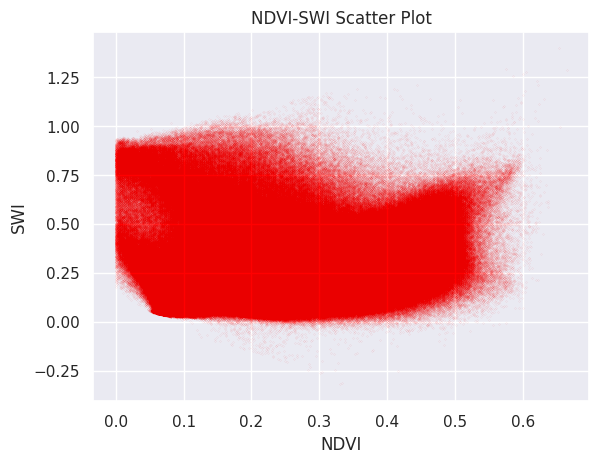

In [ ]:
# calculation of SWI and scatter plot

#SWI calculation
SWI_1 = i_d+s_d*df_new['NDVI']-df_new['STR']
SWI_2 = i_d-i_w+(s_d-s_w)*df_new['NDVI']
SWI = SWI_1/SWI_2

#plotting scatter plot
fig=plt.figure()
plt.scatter(df_new['NDVI'],SWI,s=0.001,color='red')
plt.title('NDVI-SWI Scatter Plot')
plt.xlabel('NDVI')
plt.ylabel('SWI')
plt.show()

In [ ]:
#reshaping SWI array
SWI_arr = np.array(SWI)
SWI = SWI_arr.reshape(NDVI_filtered.shape[0],NDVI_filtered.shape[1])

Text(0.5, 1.0, 'Soil Wetness Index')

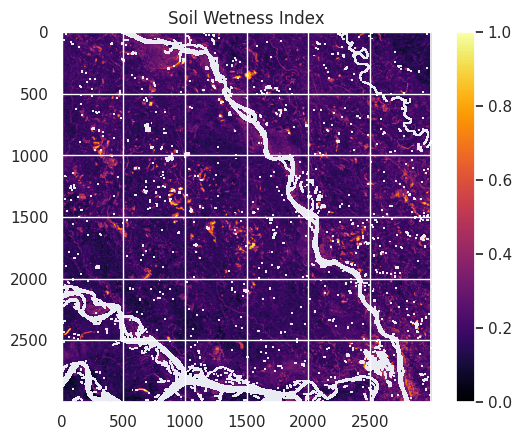

In [ ]:
#plotting SWI map
SWI_arr = np.array(SWI)
SWI = SWI_arr.reshape(NDVI_filtered.shape[0],NDVI_filtered.shape[1])
plt.imshow(SWI,cmap='inferno')
plt.colorbar()
plt.clim(0,1)
plt.title('Soil Wetness Index')


Text(0.5, 1.0, 'NDVI')

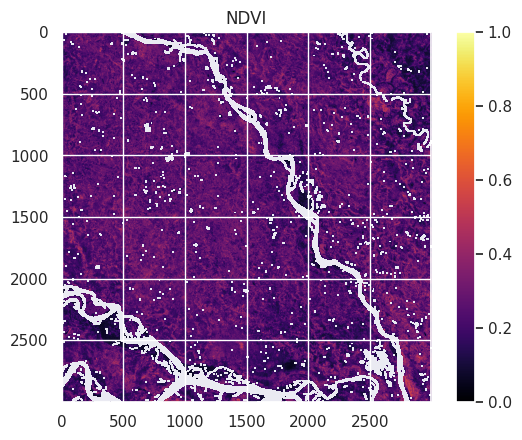

In [ ]:
#plotting NDVI map
ndvi = np.array(df_new['NDVI'])
ndvi = ndvi.reshape(NDVI_filtered.shape[0],NDVI_filtered.shape[1])
plt.imshow(ndvi,cmap='inferno')
plt.colorbar()
plt.clim(0,1)
plt.title('NDVI')